<a href="https://colab.research.google.com/github/drgarimajain/streamlit/blob/main/A2_23D1269.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine+quality/winequality-red.csv' , delimiter=';')

In [ ]:
print(red.columns.tolist())

# Show the first 5 rows of the dataset
print(red.head())

# Code taken from  stack overfolw

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.998

In [ ]:
white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine+quality/winequality-white.csv', delimiter=';')

In [ ]:
column_means = red.mean()

# Printing mean of each column with its name
print("Mean of each numeric column:")
for column_name, mean_value in column_means.items():
    print(f"{column_name}: {mean_value}")
# code taken from chatgpt
# mean of each column of redwine taken

Mean of each numeric column:
fixed acidity: 8.31963727329581
volatile acidity: 0.5278205128205128
citric acid: 0.2709756097560976
residual sugar: 2.53880550343965
chlorides: 0.08746654158849279
free sulfur dioxide: 15.874921826141339
total sulfur dioxide: 46.46779237023139
density: 0.9967466791744841
pH: 3.3111131957473416
sulphates: 0.6581488430268917
alcohol: 10.422983114446529
quality: 5.6360225140712945


In [ ]:
column_means = white.mean()

# Printing mean of each column with its name
print("Mean of each numeric column:")
for column_name, mean_value in column_means.items():
    print(f"{column_name}: {mean_value}")

Mean of each numeric column:
fixed acidity: 6.854787668436097
volatile acidity: 0.27824111882400976
citric acid: 0.33419150673744386
residual sugar: 6.391414863209474
chlorides: 0.04577235606369946
free sulfur dioxide: 35.30808493262556
total sulfur dioxide: 138.36065741118824
density: 0.9940273764801959
pH: 3.1882666394446715
sulphates: 0.48984687627603113
alcohol: 10.514267047774602
quality: 5.87790935075541


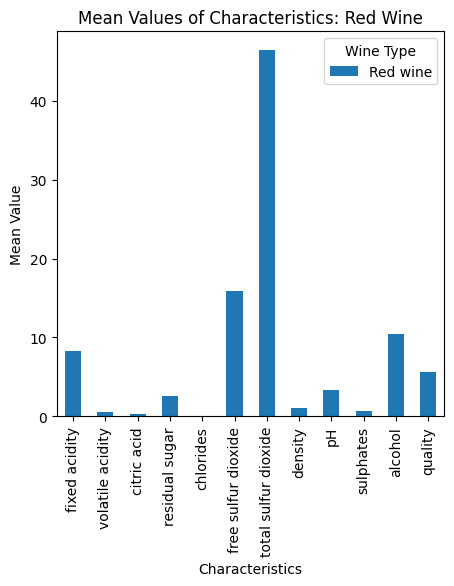

In [ ]:
red_means = red.mean(numeric_only=True)

mean_values_comparisonred = pd.DataFrame({'Red wine': red_means })
# Plotting
mean_values_comparisonred.plot(kind='bar', figsize=(5, 5))
plt.title('Mean Values of Characteristics: Red Wine')
plt.xlabel('Characteristics')
plt.ylabel('Mean Value')
plt.legend(title='Wine Type')
plt.show()

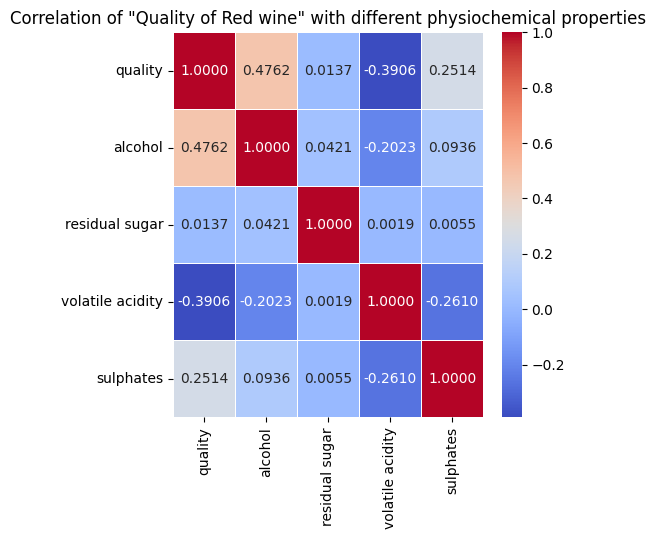

In [ ]:
#label a segment of data
qualitycorrelation_data = red[['quality','alcohol','residual sugar','volatile acidity','sulphates']]

# Calculating the correlation between datasets
corr_matrix = qualitycorrelation_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.4, fmt=".4f")
plt.title('Correlation of "Quality of Red wine" with different physiochemical properties')  # Chart title
plt.show()  # Show the plot

In [ ]:
#preprocessing
#droppingMissing values
#code taken from sci-kit learn libraray
#importing the sci-kit learn library
from sklearn.model_selection import train_test_split

red = red.dropna()

#splitting the data into training and testing dataset
X = red.drop('quality', axis=1)  # Feature to be predicted
y = red['quality']  # defining the target variable

# splitting the data into train and test set
# taking 25% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)







In [ ]:
#since the unit of measurement of different columns varies, in order to standardise the scales I have used the code standardscaleer from scikit libraray
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data
X_test_scaled = scaler.transform(X_test)

#code taken from Scikit-learn's preprocessing module

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np



rf_parameters = {'n_estimators': [250, 500], 'max_depth': [25, 50, None]}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=25), rf_parameters, cv=10)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)



#  print  Mean squared error
print('Random Forest MSE:', rf_mse)


Random Forest MSE: 0.31724186


In [ ]:
from sklearn.svm import SVR
svr_params = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svr_grid_search = GridSearchCV(SVR(kernel='rbf'), svr_params, cv=5)
svr_grid_search.fit(X_train, y_train)
best_svr_model = svr_grid_search.best_estimator_
svr_predictions = best_svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
#  print  MSE for
print('SVM MSE:', svr_mse)

SVM MSE: 0.4256605753397399


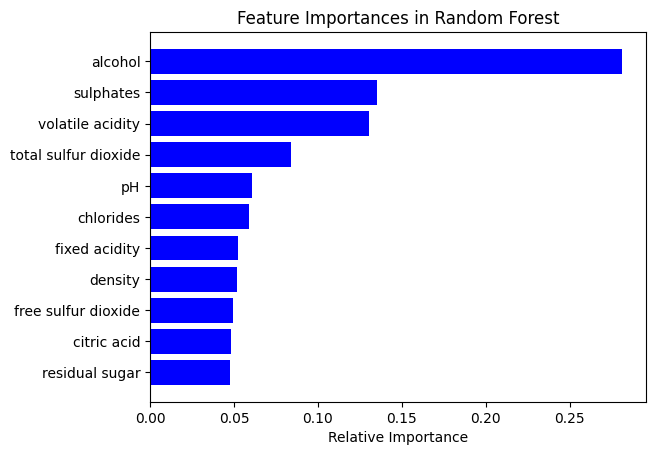

In [ ]:
importances = best_rf_model.feature_importances_
import matplotlib.pyplot as plt

features = X_train.columns
indices = np.argsort(importances)

plt.title('Feature Importances in Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


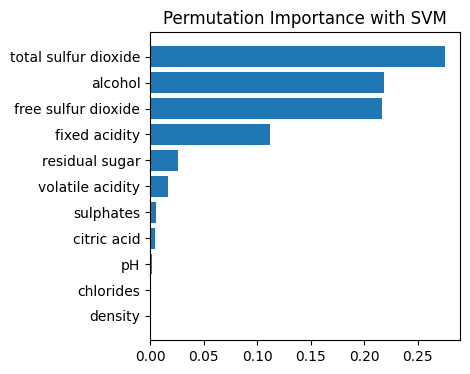

In [ ]:
from sklearn.inspection import permutation_importance

# Train the SVM model
svr = SVR(kernel='rbf', C=1, gamma=0.1)
svr.fit(X_train, y_train)

# Compute Permutation Feature Importance
perm_importance = permutation_importance(svr, X_test, y_test, n_repeats=30, random_state=42)

# Plotting
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(4, 4))
plt.barh(range(X_train.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.title("Permutation Importance with SVM")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the datasets
X_red = red.drop('quality', axis=1)
y_red = red['quality']
X_white = white.drop('quality', axis=1)
y_white = white['quality']

# Train a model for red wine
red_model = RandomForestRegressor()
red_model.fit(X_red, y_red)

# Train a model for white wine
white_model = RandomForestRegressor()
white_model.fit(X_white, y_white)

# Test the red model with white wine data
red_predictions_on_white = red_model.predict(X_white)
mse_red_on_white = mean_squared_error(y_white, red_predictions_on_white)

# Test the white model with red wine data
white_predictions_on_red = white_model.predict(X_red)
mse_white_on_red = mean_squared_error(y_red, white_predictions_on_red)

# Print the MSE for comparison
print("MSE of red wine model on white wine data:", mse_red_on_white)
print("MSE of white wine model on red wine data:", mse_white_on_red)


MSE of red wine model on white wine data: 0.7066487137607187
MSE of white wine model on red wine data: 1.2062494058786744


In [ ]:
# Question 2 Down syndrome
Mousedata = pd.read_excel('/content/drive/MyDrive/Data_Cortex_Nuclear.xls')


In [ ]:
print(Mousedata.columns)

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')


In [ ]:
miceinfor = Mousedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
# counting the number of Controls and cases in the total datset

genotype_counts = Mousedata['Genotype'].value_counts()

print(genotype_counts)

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


In [ ]:
# mean of each varaible in Control vs case

mean_by_genotype = Mousedata.groupby('Genotype').mean()

print(mean_by_genotype)

          DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
Genotype                                                               
Control   0.404756  0.575927  0.321132  2.333654  3.984687  0.229578   
Ts65Dn    0.449480  0.663394  0.316791  2.256362  3.685690  0.237204   

           pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
Genotype                                           ...                       
Control   0.181515   3.505182  0.207285  1.443155  ...  0.226943  0.157057   
Ts65Dn    0.182220   3.573004  0.218520  1.412411  ...  0.226378  0.158766   

            BCL2_N     pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  \
Genotype                                                                
Control   0.135478  0.123365  0.132923  0.460376   0.156779  0.189647   
Ts65Dn    0.134017  0.119460  0.128882  0.430088   0.183324  0.176156   

          H3MeK4_N    CaNA_N  
Genotype                      
Control   0.198516  1.324037  
Ts65Dn    0.

<ipython-input-20-2e73eefd3287>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_genotype = Mousedata.groupby('Genotype').mean()


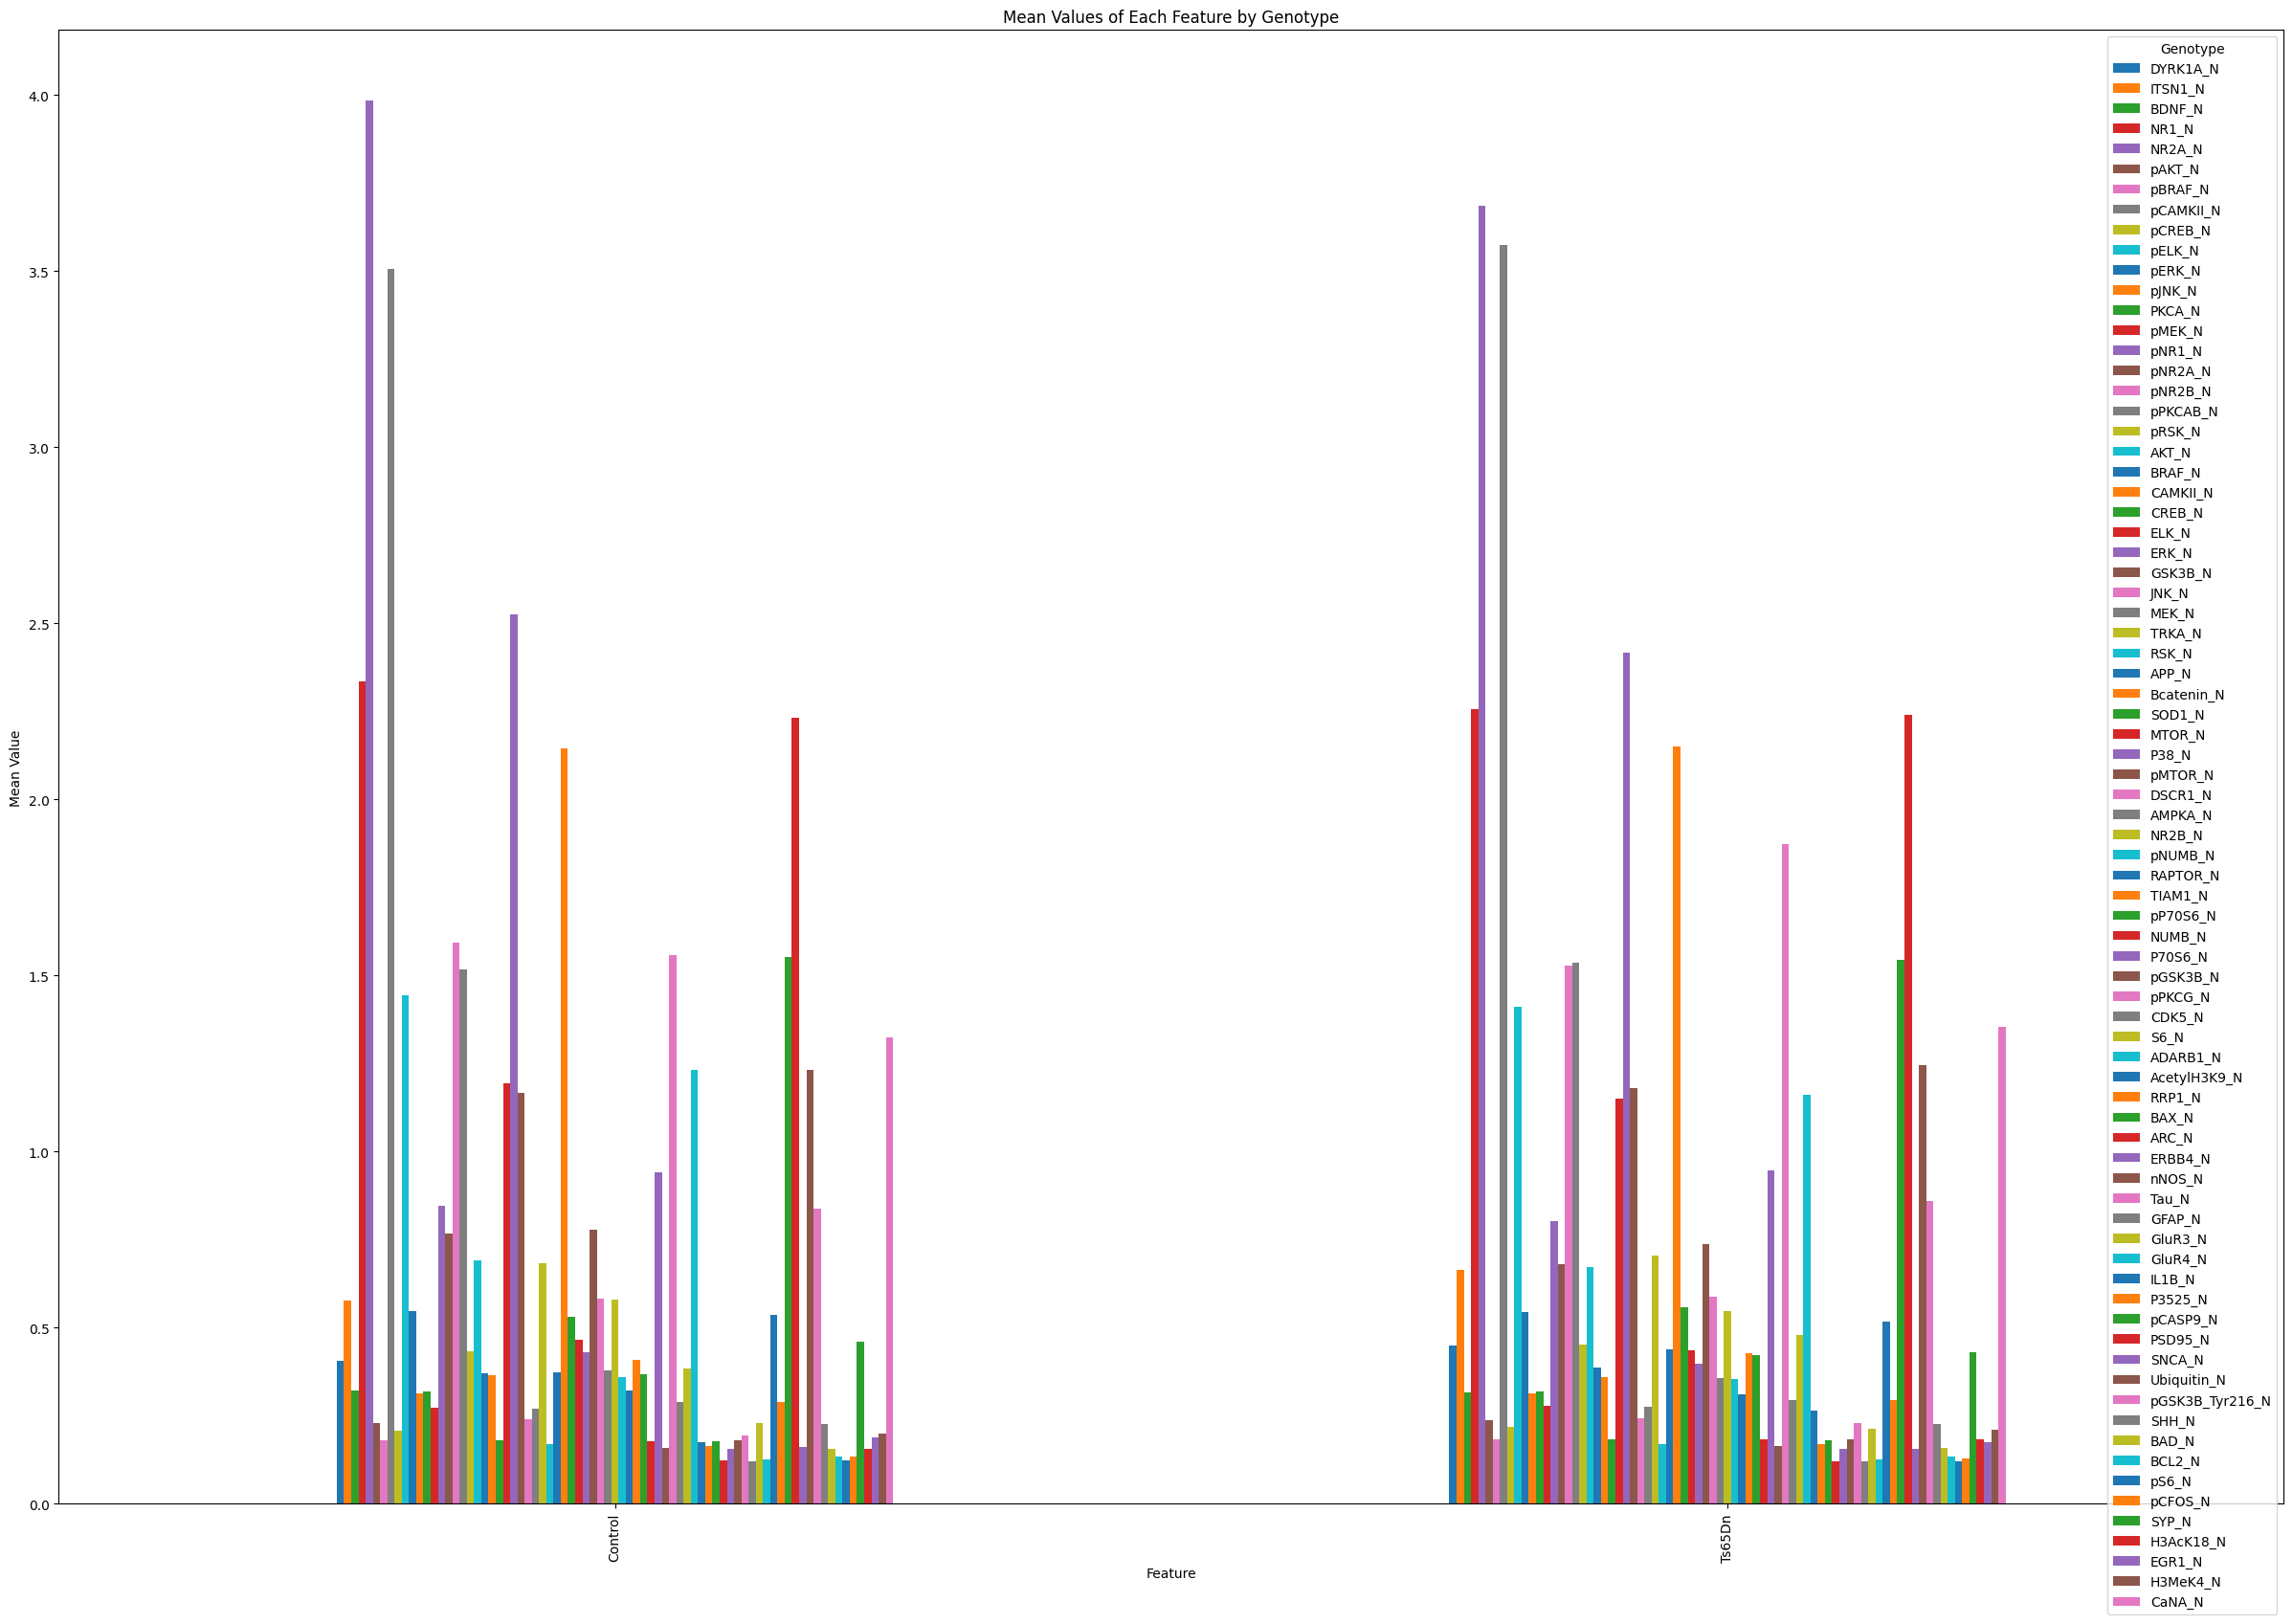

In [ ]:
#viewing the plot


# Plot
mean_by_genotype.plot(kind='bar', figsize=(30, 20))

plt.title('Mean Values of Each Feature by Genotype')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.legend(title='Genotype')
plt.show()

In [ ]:
# Calculate the max for each column by genotype
max_by_genotype = Mousedata.groupby('Genotype').max()

# Calculate the min for each column by genotype
min_by_genotype = Mousedata.groupby('Genotype').min()

# Print the maximum values for each genotype
print("Maximum values by genotype:")
print(max_by_genotype)

# Print the minimum values for each genotype
print("\nMinimum values by genotype:")
print(min_by_genotype)

Maximum values by genotype:
          MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
Genotype                                                                        
Control   J2292_9  2.516367  2.602662  0.497160  3.757641  8.482553  0.341207   
Ts65Dn    J3295_9  0.992220  1.336398  0.466673  3.100855  6.492660  0.539050   

           pBRAF_N  pCAMKII_N   pCREB_N  ...     pS6_N   pCFOS_N     SYP_N  \
Genotype                                 ...                                 
Control   0.317066    6.94729  0.305773  ...  0.154021  0.256529  0.759588   
Ts65Dn    0.312955    7.46407  0.306247  ...  0.158748  0.196505  0.636279   

          H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Treatment  Behavior   class  
Genotype                                                                        
Control    0.345455  0.360692  0.413903  2.129791     Saline       S/C  c-SC-s  
Ts65Dn     0.479763  0.314459  0.395820  2.064797     Saline       S/C  t-SC-s  

[2 rows x

In [ ]:
print(Mousedata.dtypes)

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object


In [ ]:

#Hilight the numeric data vs categorical data
is_numeric = Mousedata.select_dtypes(include=['int64', 'float64']).columns

numeric_data = Mousedata[is_numeric]
categorical_data = Mousedata.select_dtypes(exclude=['int64', 'float64'])

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame and it has numerical columns with missing values
simple_imputer = SimpleImputer(strategy='mean')
numeric_data_preimputed = simple_imputer.fit_transform(numeric_data)
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1), max_iter=10, tol=1e-3, verbose=2)
# Fit on the dataset and transform it to impute the missing values

imputed_data = imputer.fit_transform(numeric_data)
# Converting the imputed numpy array back to a pandas DataFrame


imputed_numeric_data = pd.DataFrame(imputed_data, columns=numeric_data.columns)
# Now imputed_df has the missing values imputed, and you can use it for further analysis

[IterativeImputer] Completing matrix with shape (1080, 77)
[IterativeImputer] Ending imputation round 1/10, elapsed time 166.88
[IterativeImputer] Change: 1.3891598855665612, scaled tolerance: 0.008482553422000001 
[IterativeImputer] Ending imputation round 2/10, elapsed time 334.68
[IterativeImputer] Change: 1.1580574171000033, scaled tolerance: 0.008482553422000001 
[IterativeImputer] Ending imputation round 3/10, elapsed time 499.41
[IterativeImputer] Change: 1.008324613440001, scaled tolerance: 0.008482553422000001 
[IterativeImputer] Ending imputation round 4/10, elapsed time 664.72
[IterativeImputer] Change: 0.8293696089600017, scaled tolerance: 0.008482553422000001 
[IterativeImputer] Ending imputation round 5/10, elapsed time 823.50
[IterativeImputer] Change: 0.697385268399997, scaled tolerance: 0.008482553422000001 
[IterativeImputer] Ending imputation round 6/10, elapsed time 982.79
[IterativeImputer] Change: 0.656395498219996, scaled tolerance: 0.008482553422000001 
[Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
NAs = pd.concat([imputed_numeric_data.isnull().sum()], axis=1, keys=["imputed_numeric_data"])
NAs[NAs.sum(axis=1)>0]

,imputed_numeric_data


In [ ]:
merged_Mousedata = pd.concat([imputed_numeric_data, categorical_data], axis=1)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Mousedata' is your DataFrame and 'Genotype' is the target variable.
# 'Treatment', 'Behavior', 'class', 'MouseID' are categorical features.

# Separate the target variable and features
X = merged_Mousedata.drop('Genotype', axis=1)  # Features
y = merged_Mousedata['Genotype']  # Target variable

# One-hot encode the categorical columns except the target variable
X_encoded = pd.get_dummies(X, columns=['Treatment', 'Behavior', 'class', 'MouseID'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.6, random_state=87)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9768518518518519
Classification Report:
               precision    recall  f1-score   support

     Control       0.98      0.98      0.98       349
      Ts65Dn       0.98      0.97      0.97       299

    accuracy                           0.98       648
   macro avg       0.98      0.98      0.98       648
weighted avg       0.98      0.98      0.98       648



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = merged_Mousedata.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = merged_Mousedata.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
Categorical Features: ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define your Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Initialize the SVM with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Create the pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm_model)
])

# Perform cross-validation
cv_scores = cross_val_score(svm_pipeline, X, y, cv=5, scoring='accuracy')

# Output the cross-validation results
print(cv_scores)
print("Average CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


[0.93518519 0.69907407 0.69444444 0.88888889 0.84259259]
Average CV Score: 0.812037037037037
Standard Deviation of CV Scores: 0.09858393817930494


In [ ]:
print(column_name)
merged_Mousedata.info()
merged_Mousedata.head()

quality
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,MouseID,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.427099,0.114783,0.131790,0.128186,1.675652,309_1,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.441581,0.111974,0.135103,0.131119,1.743610,309_2,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.435777,0.111883,0.133362,0.127431,1.926427,309_3,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.391691,0.130405,0.147444,0.146901,1.700563,309_4,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.434154,0.118481,0.140314,0.148380,1.839730,309_5,Control,Memantine,C/S,c-CS-m


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# input split
X_encoded = pd.get_dummies(merged_Mousedata.drop('Genotype', axis=1), columns=['Treatment', 'Behavior', 'class', 'MouseID'])

y = merged_Mousedata['Genotype']
print(y.dtype)



object


In [ ]:
X.shape

(1080, 81)

In [ ]:
y.shape

(1080,)

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X_encoded, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [ ]:
for i, col in zip(range(X.shape[1]), X.columns):
  print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

DYRK1A_N selected=False rank=1165
ITSN1_N selected=False rank=1164
BDNF_N selected=False rank=1163
NR1_N selected=False rank=1162
NR2A_N selected=False rank=1161
pAKT_N selected=False rank=1160
pBRAF_N selected=False rank=1159
pCAMKII_N selected=False rank=1158
pCREB_N selected=False rank=1157
pELK_N selected=False rank=1156
pERK_N selected=False rank=1155
pJNK_N selected=False rank=1154
PKCA_N selected=False rank=1153
pMEK_N selected=False rank=1152
pNR1_N selected=False rank=1151
pNR2A_N selected=False rank=9
pNR2B_N selected=False rank=21
pPKCAB_N selected=False rank=20
pRSK_N selected=False rank=19
AKT_N selected=False rank=18
BRAF_N selected=False rank=17
CAMKII_N selected=False rank=16
CREB_N selected=False rank=14
ELK_N selected=False rank=15
ERK_N selected=False rank=13
GSK3B_N selected=False rank=12
JNK_N selected=False rank=11
MEK_N selected=False rank=22
TRKA_N selected=False rank=24
RSK_N selected=False rank=26
APP_N selected=True rank=1
Bcatenin_N selected=False rank=30
SO

In [ ]:
#AMPKA_N and APP_N are the only 2 features with Rank 1

In [ ]:
#Question 3
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory


cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data'
import os
print(os.listdir(data_dir))
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

['train', 'val']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Set up different transformations for the training and validation sets
from os.path import join
from os import listdir
transformations = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

data_path = '/content/drive/MyDrive/hymenoptera_data'
from os import listdir
print(listdir(data_path))
image_data = {section: datasets.ImageFolder(join(data_path, section),
                                            transformations[section])
              for section in ['train', 'val']}
data_loaders = {section: torch.utils.data.DataLoader(image_data[section], batch_size=4,
                                                     shuffle=True, num_workers=4)
                for section in ['train', 'val']}
data_volumes = {section: len(image_data[section]) for section in ['train', 'val']}
category_names = image_data['train'].classes

# Determine if a GPU is available and set the device accordingly
compute_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


['train', 'val']


In [ ]:
from os import listdir
print(listdir(data_path))
image_data = {section: datasets.ImageFolder(join(data_path, section),
                                            transformations[section])
              for section in ['train', 'val']}

['train', 'val']


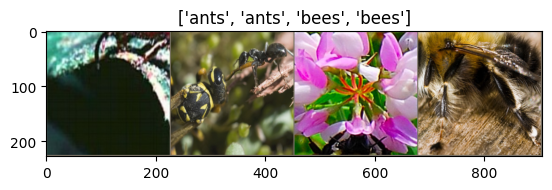

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5295 Acc: 0.7172
val Loss: 0.2322 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.5892 Acc: 0.7418
val Loss: 0.4548 Acc: 0.8235

Epoch 2/24
----------
train Loss: 0.5245 Acc: 0.8074
val Loss: 0.3009 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.5159 Acc: 0.7910
val Loss: 0.1950 Acc: 0.9542

Epoch 4/24
----------
train Loss: 0.5407 Acc: 0.7992
val Loss: 0.3439 Acc: 0.8889

Epoch 5/24
----------
train Loss: 0.5378 Acc: 0.7623
val Loss: 0.1915 Acc: 0.9542

Epoch 6/24
----------
train Loss: 0.5677 Acc: 0.7705
val Loss: 0.2115 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.3087 Acc: 0.8689
val Loss: 0.1851 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3658 Acc: 0.8320
val Loss: 0.1854 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3300 Acc: 0.8238
val Loss: 0.1919 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3318 Acc: 0.8648
val Loss: 0.2012 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.3375 Acc: 0.8484
val Loss: 0.1769 Acc: 0.9542

Ep

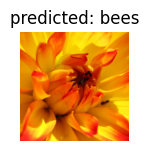

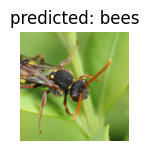

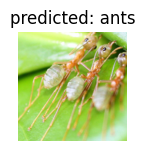

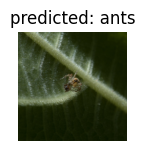

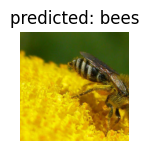

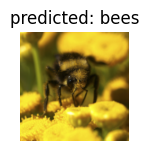

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

# New Section

In [ ]:
import joblib
import streamlit as smlt
joblib.dump(best_rf_model, 'random_forest_model.pkl')
loaded_model = joblib.load('random_forest_model.pkl')


smlt.title('Wine Quality Prediction App')
smlt.caption('Know the quality of Wine you drink!!!')
smlt.table(red)
smlt.table(white)

alcohol = smlt.slider('Alcohol percentage', min_value=8.0, max_value=100.0, value=0.5, step=0.5)
acidity = smlt.slider('Acidity', min_value=0.0, max_value=1.0, value=0.5, step=0.01)
citrus = smlt.slider('Citrus', min_value=0.0, max_value=1.0, value=0.5, step=0.01)


if smlt.button('Predict Quality'):
    # Put all feature inputs into a numpy array
    features = np.array([[acidity, citrus, alcohol]]) \
    quality = best_rf_model.predict(features)
    smlt.write(f'The predicted quality is: {quality[0]}')


SyntaxError: invalid syntax (<ipython-input-47-59c49e09c45e>, line 20)